In [18]:
# File to Load 
file_to_load = '../resources/steam.csv'

In [19]:
# Import Dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [20]:
# Read the csv file 
games_features = pd.read_csv(file_to_load)

games_features.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [21]:
games_features['steamspy_tags'].head(40)

0                   Action;FPS;Multiplayer
1                   Action;FPS;Multiplayer
2             FPS;World War II;Multiplayer
3                   Action;FPS;Multiplayer
4                        FPS;Action;Sci-fi
5                   Action;FPS;Multiplayer
6                       FPS;Classic;Action
7                   Action;FPS;Multiplayer
8                        FPS;Action;Sci-fi
9                        FPS;Action;Sci-fi
10                  Action;FPS;Multiplayer
11                       FPS;Action;Sci-fi
12            FPS;World War II;Multiplayer
13                  Action;FPS;Multiplayer
14                 FPS;Action;Singleplayer
15                  Action;FPS;Multiplayer
16                       FPS;Action;Sci-fi
17        Puzzle;First-Person;Singleplayer
18                       FPS;Action;Sci-fi
19            Free to Play;Multiplayer;FPS
20                       Zombies;Co-op;FPS
21                       Zombies;Co-op;FPS
22              Free to Play;MOBA;Strategy
23         

In [22]:
(games_features['positive_ratings'] + games_features['negative_ratings']) / games_features['positive_ratings']

0        1.026812
1        1.190778
2        1.116511
3        1.209741
4        1.054857
           ...   
27070    1.000000
27071    1.125000
27072         inf
27073    1.000000
27074    1.000000
Length: 27075, dtype: float64

In [23]:
games_features['percent_positive_reviews'] = games_features['positive_ratings'] / (games_features['positive_ratings'] + games_features['negative_ratings'])

In [24]:
games_features.tail()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,percent_positive_reviews
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,1.000000
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69,0.888889
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99,0.000000
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19,1.000000
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19,1.000000


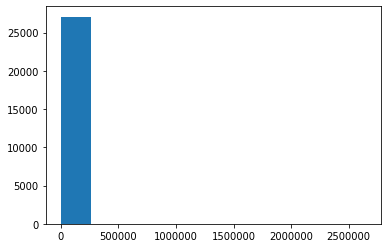

In [25]:
plt.hist(games_features["positive_ratings"], bins = 10)
plt.show()

In [26]:
games_features = games_features.loc[games_features['positive_ratings'] > 100, ]

In [27]:
games_features.shape

(7492, 19)

In [28]:
games_features.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,percent_positive_reviews
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,0.973888
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,0.839787
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,0.895648
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,0.826623
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,0.947996


In [29]:
games_features = games_features[["name", "percent_positive_reviews"]]

In [30]:
games_features.head()

,name,percent_positive_reviews
0,Counter-Strike,0.973888
1,Team Fortress Classic,0.839787
2,Day of Defeat,0.895648
3,Deathmatch Classic,0.826623
4,Half-Life: Opposing Force,0.947996


In [31]:
games_features.dtypes

name                         object
percent_positive_reviews    float64
dtype: object

In [32]:
games_features['percent_positive_reviews'] = games_features['percent_positive_reviews'] * 100

In [33]:
games_features.head()

,name,percent_positive_reviews
0,Counter-Strike,97.388815
1,Team Fortress Classic,83.978740
2,Day of Defeat,89.564761
3,Deathmatch Classic,82.662338
4,Half-Life: Opposing Force,94.799567


In [34]:
games_features['percent_positive_reviews'] = games_features['percent_positive_reviews'].round()

In [36]:
games_features.head(20)

,name,percent_positive_reviews
0,Counter-Strike,97.0
1,Team Fortress Classic,84.0
2,Day of Defeat,90.0
3,Deathmatch Classic,83.0
4,Half-Life: Opposing Force,95.0
5,Ricochet,80.0
6,Half-Life,96.0
7,Counter-Strike: Condition Zero,89.0
8,Half-Life: Blue Shift,90.0
9,Half-Life 2,97.0


In [37]:
games_features.to_csv(r'../resources/user_reviews.csv')